# <span style="color:green"> Laboratorio di Simulazione Numerica (LSN) </span>

Nome: Davide Castellani  
Matricola: 967270  
email: davide.castellani1@studenti.unimi.it

## <span style="color:red">  Esercitazione 06</span>

In quest'esercitazione viene simulato un Modello di Ising (IM) monodimensionale con condizioni al contorno periodiche, ovvero un sistema di N spin che intergiscono solo con quelli adiacenti tramite la seguente Hamiltoniana:
$$H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) $$
dove $s_i=\pm1$ e $J>0$.  
Una volta scritta la funzione di partizione dell'IM,
$$Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N$$
con
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, la fisica statistica ci permette di calcolare l'andamento analitico di diverse quantità termodinamiche in funzione della temperatura. In particolare:

- l'**energia interna** per spin (con $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= -J \tanh(\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

- la **capacità termica** per spin (con $h=0$):

$$
\frac{C(N,T)}{N}  = \frac{1}{N}\frac{\partial U(N,T)}{\partial T}= \frac{k_B\beta^2}{N}\left(\langle H^2 \rangle -\langle H \rangle^2 \right) =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

- La **magnetizzazione** (con $h \neq 0$):

$$
\frac{M(N,T,h)}{N}=\frac{ k_B T}{N}\frac{\partial \ln Z}{\partial h} = \frac{1}{N}\left\langle \sum_{i=1,N}s_i \right\rangle =
\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

OSS: con $h=0$ la magnetizzazione sarebbe nulla perché in 1D non è possibile avere una transizione di fase ferromagnetica in assenza di un campo esterno.

- La **suscettività magnetica** (con $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} =
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

## <span style="color:blue"> Esercizio 06.1 </span>

È stato completato il codice fornito con due algoritmi di campionamento:
- **Metropolis**: ogni mossa propone ad uno spin selezionato randomicamente di cambiare segno, ovvero $s_o\to-s_o$. Essa verrà accettata con probabilità pari al peso di Boltzmann $p=\exp{(-\beta \Delta E)}$, altrimenti $s_o$ rimane del segno iniziale.
- **Gibbs**: ogni mossa propone ad uno spin selezionato randomicamente di diventare +1 indipendentemente dal suo valore attuale, ovvero $s_o\to+1$. Essa verrà accettata con probabilità $p=\left[1+\exp{(-2\beta (J(s_{o-1}+s_{o+1})+h))}\right]^{-1}$, altrimenti $s_o$ verrà posto a -1.

Sono state quindi campionate le quantità termodinamiche sopracitate per un sistema di $N=50$ spin e con $J=1$, utilizzando:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

Per confrontare la simulazione con i risulati teorici, si è ripetuta la simulazione per 20 valori di T compresi in $\left[0.5;2.0\right]$ e, dividendo le misure in 50 blocchi da 10000 misure ciascuno, sono state calcolate le medie progressive e i loro errori statistici.

I risultati sono riportati nei seguenti grafici.

### Energia interna

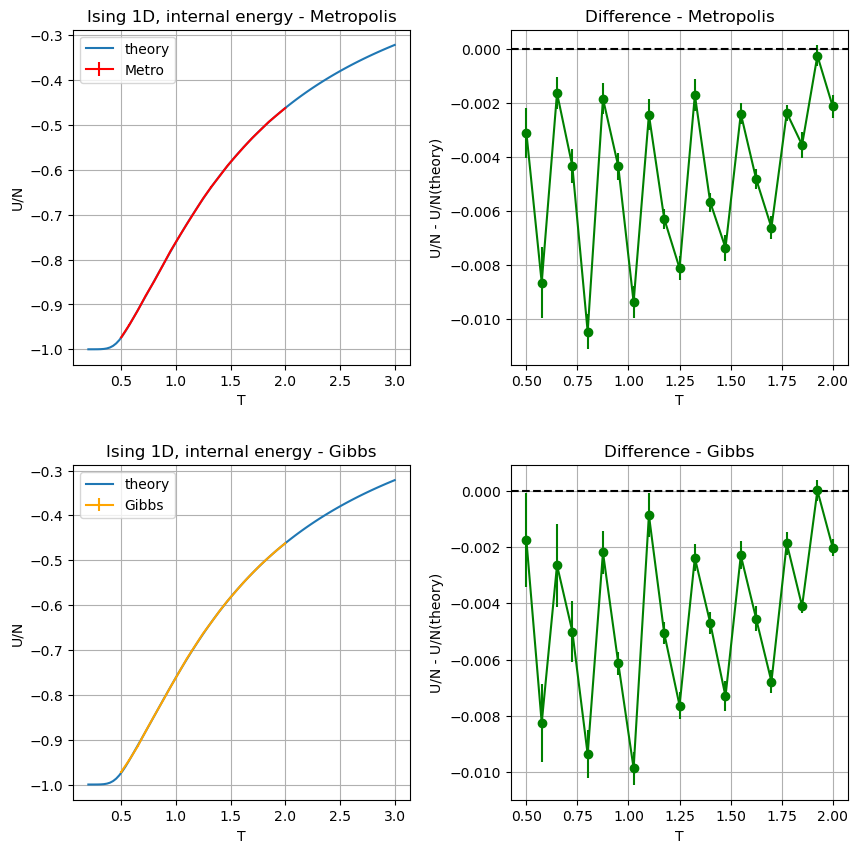

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Leggi i dati dal file
data = np.loadtxt("M.output.ene.0")
dataG = np.loadtxt("G.output.ene.0")

# Seleziona solo i valori che hanno 20 nella prima colonna
selected_data = data[np.where(data[:,0] == 20)]
selected_dataG = dataG[np.where(dataG[:,0] == 20)]

# Crea il grafico teorico
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

# Crea una figura con quattro assi
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Imposta lo spazio tra i subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

#Metropolis
# Plotta il grafico sull'asse sinistro in alto
axs[0,0].plot(T, e, label='theory')
axs[0,0].errorbar(selected_data[:,1], selected_data[:,3], yerr=selected_data[:,4], fmt='-', color='red', label='Metro')
axs[0,0].set_title('Ising 1D, internal energy - Metropolis')
axs[0,0].set_xlabel("T")
axs[0,0].set_ylabel("U/N")
axs[0,0].legend()

# Calcola la differenza tra i dati e il grafico teorico
diff = selected_data[:,3] - e[np.searchsorted(T, selected_data[:,1])]

# Plotta la differenza sull'asse destro in alto
axs[0,1].errorbar(selected_data[:,1], diff, yerr=selected_data[:,4],fmt='o-', color='green')
axs[0,1].axhline(y=0, color='black', linestyle='--')
axs[0,1].set_title('Difference - Metropolis')
axs[0,1].set_xlabel("T")
axs[0,1].set_ylabel("U/N - U/N(theory)")


# Gibbs
# Plotta il grafico sull'asse sinistro in basso
axs[1,0].plot(T, e, label='theory')
axs[1,0].errorbar(selected_dataG[:,1], selected_dataG[:,3], yerr=selected_dataG[:,4], fmt='-', color='orange', label='Gibbs')
axs[1,0].set_title('Ising 1D, internal energy - Gibbs')
axs[1,0].set_xlabel("T")
axs[1,0].set_ylabel("U/N")
axs[1,0].legend()

# Calcola la differenza tra i dati e il grafico teorico
diffG = selected_dataG[:,3] - e[np.searchsorted(T, selected_dataG[:,1])]

# Plotta la differenza sull'asse destro in basso
axs[1,1].errorbar(selected_dataG[:,1], diffG, yerr=selected_dataG[:,4],fmt='o-', color='green')
axs[1,1].axhline(y=0, color='black', linestyle='--')
axs[1,1].set_title('Difference - Gibbs')
axs[1,1].set_xlabel("T")
axs[1,1].set_ylabel("U/N - U/N(theory)")

# Aggiungi la griglia a ciascun subplot
for row in axs:
    for ax in row:
        ax.grid(True)

# Mostra la figura
plt.show()

### Capacità termica

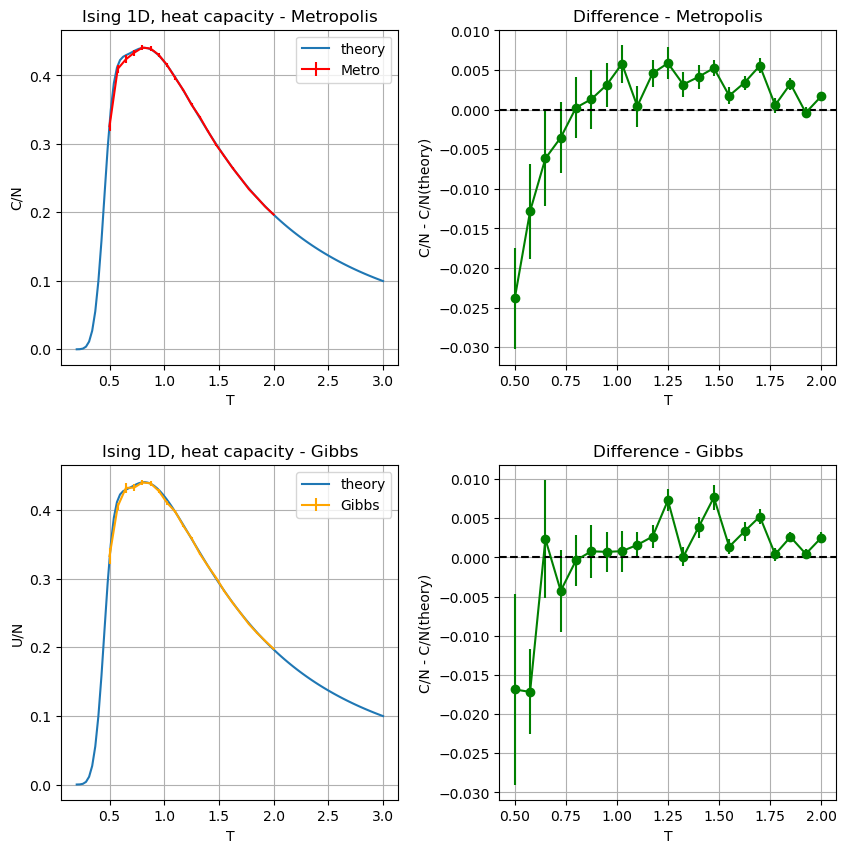

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Leggi i dati dal file
data = np.loadtxt("M.output.heat.0")
dataG = np.loadtxt("G.output.heat.0")

# Seleziona solo i valori che hanno 20 nella prima colonna
selected_data = data[np.where(data[:,0] == 20)]
selected_dataG = dataG[np.where(dataG[:,0] == 20)]

# Crea il grafico teorico
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

# Crea una figura con quattro assi
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Imposta lo spazio tra i subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

#Metropolis
# Plotta il grafico sull'asse sinistro in alto
axs[0,0].plot(T, heat, label='theory')
axs[0,0].errorbar(selected_data[:,1], selected_data[:,3], yerr=selected_data[:,4], fmt='-', color='red', label='Metro')
axs[0,0].set_title('Ising 1D, heat capacity - Metropolis')
axs[0,0].set_xlabel("T")
axs[0,0].set_ylabel("C/N")
axs[0,0].legend()

# Calcola la differenza tra i dati e il grafico teorico
diff = selected_data[:,3] - heat[np.searchsorted(T, selected_data[:,1])]

# Plotta la differenza sull'asse destro in alto
axs[0,1].errorbar(selected_data[:,1], diff, yerr=selected_data[:,4],fmt='o-', color='green')
axs[0,1].axhline(y=0, color='black', linestyle='--')
axs[0,1].set_title('Difference - Metropolis')
axs[0,1].set_xlabel("T")
axs[0,1].set_ylabel("C/N - C/N(theory)")


# Gibbs
# Plotta il grafico sull'asse sinistro in basso
axs[1,0].plot(T, heat, label='theory')
axs[1,0].errorbar(selected_dataG[:,1], selected_dataG[:,3], yerr=selected_dataG[:,4], fmt='-', color='orange', label='Gibbs')
axs[1,0].set_title('Ising 1D, heat capacity - Gibbs')
axs[1,0].set_xlabel("T")
axs[1,0].set_ylabel("U/N")
axs[1,0].legend()

# Calcola la differenza tra i dati e il grafico teorico
diffG = selected_dataG[:,3] - heat[np.searchsorted(T, selected_dataG[:,1])]

# Plotta la differenza sull'asse destro in basso
axs[1,1].errorbar(selected_dataG[:,1], diffG, yerr=selected_dataG[:,4],fmt='o-', color='green')
axs[1,1].axhline(y=0, color='black', linestyle='--')
axs[1,1].set_title('Difference - Gibbs')
axs[1,1].set_xlabel("T")
axs[1,1].set_ylabel("C/N - C/N(theory)")

# Aggiungi la griglia a ciascun subplot
for row in axs:
    for ax in row:
        ax.grid(True)

# Mostra la figura
plt.show()

### Suscettività magnetica

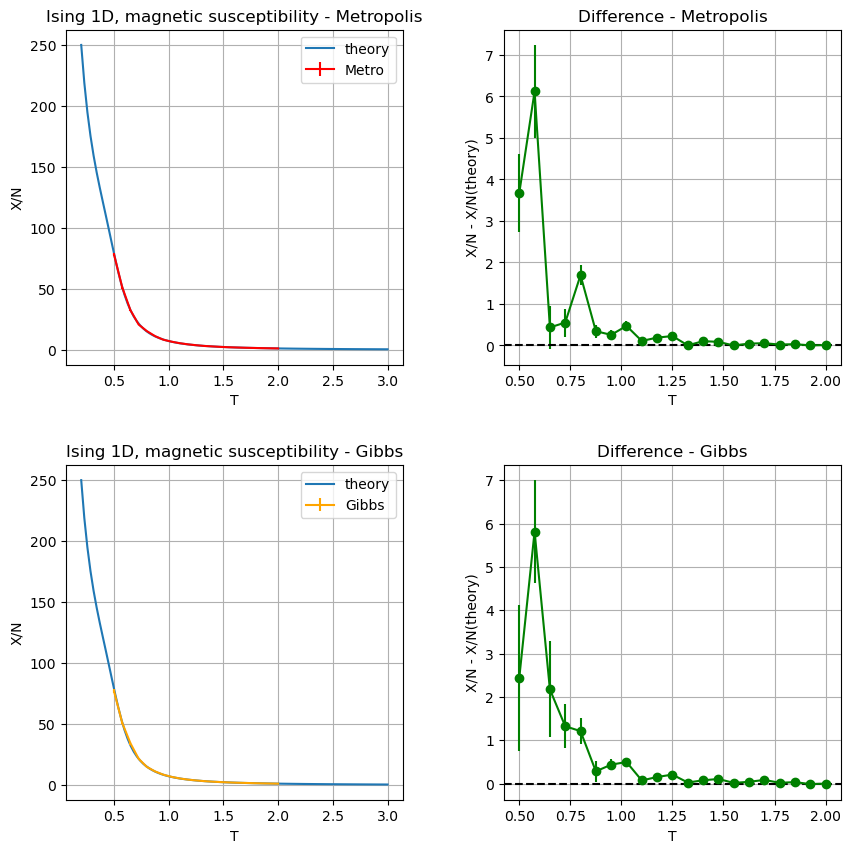

In [3]:
# Leggi i dati dal file
data = np.loadtxt("M.output.chi.0")
dataG = np.loadtxt("G.output.chi.0")

# Seleziona solo i valori che hanno 20 nella prima colonna
selected_data = data[np.where(data[:,0] == 20)]
selected_dataG = dataG[np.where(dataG[:,0] == 20)]

# Crea il grafico teorico
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

# Crea una figura con quattro assi
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Imposta lo spazio tra i subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

#Metropolis
# Plotta il grafico sull'asse sinistro in alto
axs[0,0].plot(T, X, label='theory')
axs[0,0].errorbar(selected_data[:,1], selected_data[:,3], yerr=selected_data[:,4], fmt='-', color='red', label='Metro')
axs[0,0].set_title('Ising 1D, magnetic susceptibility - Metropolis')
axs[0,0].set_xlabel("T")
axs[0,0].set_ylabel("X/N")
axs[0,0].legend()

# Calcola la differenza tra i dati e il grafico teorico
diff = selected_data[:,3] - X[np.searchsorted(T, selected_data[:,1])]

# Plotta la differenza sull'asse destro in alto
axs[0,1].errorbar(selected_data[:,1], diff, yerr=selected_data[:,4],fmt='o-', color='green')
axs[0,1].axhline(y=0, color='black', linestyle='--')
axs[0,1].set_title('Difference - Metropolis')
axs[0,1].set_xlabel("T")
axs[0,1].set_ylabel("X/N - X/N(theory)")


# Gibbs
# Plotta il grafico sull'asse sinistro in basso
axs[1,0].plot(T, X, label='theory')
axs[1,0].errorbar(selected_dataG[:,1], selected_dataG[:,3], yerr=selected_dataG[:,4], fmt='-', color='orange', label='Gibbs')
axs[1,0].set_title('Ising 1D, magnetic susceptibility - Gibbs')
axs[1,0].set_xlabel("T")
axs[1,0].set_ylabel("X/N")
axs[1,0].legend()

# Calcola la differenza tra i dati e il grafico teorico
diffG = selected_dataG[:,3] - X[np.searchsorted(T, selected_dataG[:,1])]

# Plotta la differenza sull'asse destro in basso
axs[1,1].errorbar(selected_dataG[:,1], diffG, yerr=selected_dataG[:,4],fmt='o-', color='green')
axs[1,1].axhline(y=0, color='black', linestyle='--')
axs[1,1].set_title('Difference - Gibbs')
axs[1,1].set_xlabel("T")
axs[1,1].set_ylabel("X/N - X/N(theory)")

# Aggiungi la griglia a ciascun subplot
for row in axs:
    for ax in row:
        ax.grid(True)

# Mostra la figura
plt.show()

### Magnetizzazione

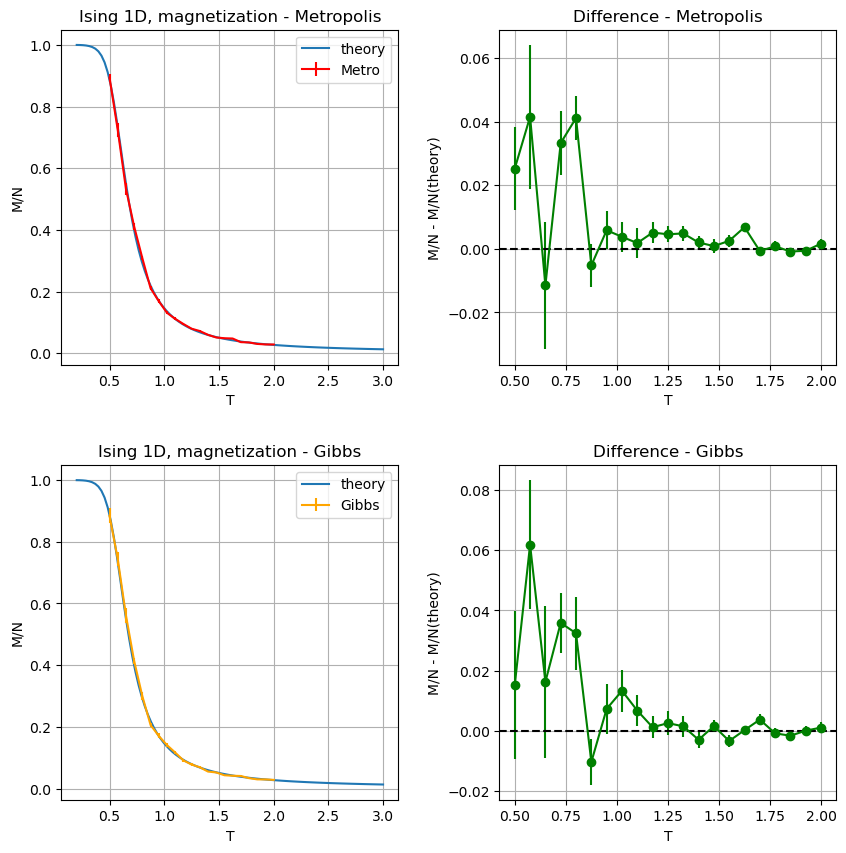

In [4]:
# Leggi i dati dal file
data = np.loadtxt("M.output.mag.0")
dataG = np.loadtxt("G.output.mag.0")

# Seleziona solo i valori che hanno 20 nella prima colonna
selected_data = data[np.where(data[:,0] == 20)]
selected_dataG = dataG[np.where(dataG[:,0] == 20)]

# Crea il grafico teorico
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

# Crea una figura con quattro assi
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Imposta lo spazio tra i subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

#Metropolis
# Plotta il grafico sull'asse sinistro in alto
axs[0,0].plot(T, M, label='theory')
axs[0,0].errorbar(selected_data[:,1], selected_data[:,3], yerr=selected_data[:,4], fmt='-', color='red', label='Metro')
axs[0,0].set_title('Ising 1D, magnetization - Metropolis')
axs[0,0].set_xlabel("T")
axs[0,0].set_ylabel("M/N")
axs[0,0].legend()

# Calcola la differenza tra i dati e il grafico teorico
diff = selected_data[:,3] - M[np.searchsorted(T, selected_data[:,1])]

# Plotta la differenza sull'asse destro in alto
axs[0,1].errorbar(selected_data[:,1], diff, yerr=selected_data[:,4],fmt='o-', color='green')
axs[0,1].axhline(y=0, color='black', linestyle='--')
axs[0,1].set_title('Difference - Metropolis')
axs[0,1].set_xlabel("T")
axs[0,1].set_ylabel("M/N - M/N(theory)")


# Gibbs
# Plotta il grafico sull'asse sinistro in basso
axs[1,0].plot(T, M, label='theory')
axs[1,0].errorbar(selected_dataG[:,1], selected_dataG[:,3], yerr=selected_dataG[:,4], fmt='-', color='orange', label='Gibbs')
axs[1,0].set_title('Ising 1D, magnetization - Gibbs')
axs[1,0].set_xlabel("T")
axs[1,0].set_ylabel("M/N")
axs[1,0].legend()

# Calcola la differenza tra i dati e il grafico teorico
diffG = selected_dataG[:,3] - M[np.searchsorted(T, selected_dataG[:,1])]

# Plotta la differenza sull'asse destro in basso
axs[1,1].errorbar(selected_dataG[:,1], diffG, yerr=selected_dataG[:,4],fmt='o-', color='green')
axs[1,1].axhline(y=0, color='black', linestyle='--')
axs[1,1].set_title('Difference - Gibbs')
axs[1,1].set_xlabel("T")
axs[1,1].set_ylabel("M/N - M/N(theory)")

# Aggiungi la griglia a ciascun subplot
for row in axs:
    for ax in row:
        ax.grid(True)

# Mostra la figura
plt.show()

### Nota sull'equilibrazione

Il sistema viene inizializzato con tutti gli spin nella configurazione up. Questo può comportare problemi di accettazione delle mosse proposte con il Metropolis a basse temperature, in quanto a partità di $\Delta E$, $p= e^{-\beta\Delta E}$ decade esponenzialmete al diminuire di $T$.  
La questione può essere risolta in due modi:
1. iniziando a prendere le misure una volta che il sistema abbia raggiunto l'equilibrio

2. facendo partire la simulazione dal valore massimo della temperatura e, ogni volta che viene diminuita, utilizzando come configurazione iniziale quella finale della T precedente.

Nelle simulazioni precedenti è stato scelto il secondo metodo.